# Modelo de Kuramoto
### Matheus Araujo Pinheiro  - 14676810

In [1]:
#Bibliotecas

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import odeint

Simulando Watts–Strogatz: 100%|██████████| 30/30 [00:17<00:00,  1.67it/s]


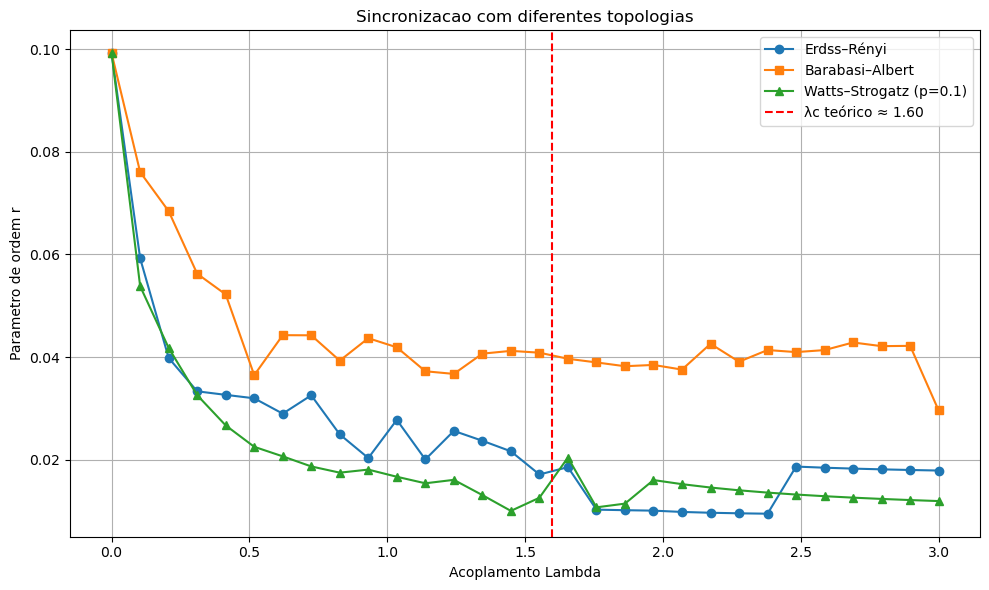

In [2]:
# Parametro
N = 100  # Numero de nos
K_values = np.linspace(0, 3, 30)  # Lambda
T = 100
dt = 0.1
t = np.arange(0, T, dt)
omega = np.random.normal(0, 1, N)

# Inicia as fases
theta0 = np.random.uniform(0, 2*np.pi, N)

# Funcaoo do modelo de kuramoto
def kuramoto_deriv(theta, t, omega, K, A):
    N = len(theta)
    dtheta_dt = omega + K * np.sum(A * np.sin(np.subtract.outer(theta, theta)), axis=1)
    return dtheta_dt

# Calculo do parametro de ordem r
def order_parameter(theta):
    return np.abs(np.sum(np.exp(1j * theta)) / len(theta))

# Simulacao
def simulate_kuramoto(G, name):
    A = nx.to_numpy_array(G)
    r_values = []

    for K in tqdm(K_values, desc=f"Simulando {name}"):
        sol = odeint(kuramoto_deriv, theta0, t, args=(omega, K, A))
        r_t = np.array([order_parameter(theta) for theta in sol])
        r_values.append(np.mean(r_t[int(len(r_t) * 0.5):]))  # Media pos transientes
    return r_values

# Geracao das Redes
G_er = nx.erdos_renyi_graph(N, p=0.1)
G_ba = nx.barabasi_albert_graph(N, m=5)
G_ws = nx.watts_strogatz_graph(N, k=10, p=0.1)

# Simulacao das redes
r_er = simulate_kuramoto(G_er, "Erdss–Renyi")
r_ba = simulate_kuramoto(G_ba, "Barabasi–Albert")
r_ws = simulate_kuramoto(G_ws, "Watts–Strogatz")

# Plot do grafico
plt.figure(figsize=(10, 6))
plt.plot(K_values, r_er, label='Erdss–Rényi', marker='o')
plt.plot(K_values, r_ba, label='Barabasi–Albert', marker='s')
plt.plot(K_values, r_ws, label='Watts–Strogatz (p=0.1)', marker='^')

# Critico teorico (lambda)
lambda_c = 2 / (np.pi * (1/np.sqrt(2*np.pi)))
plt.axvline(lambda_c, color='r', linestyle='--', label=f'λc teórico ≈ {lambda_c:.2f}')

plt.xlabel("Acoplamento Lambda")
plt.ylabel("Parametro de ordem r")
plt.title("Sincronizacao com diferentes topologias")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Simulando WS p=0.0: 100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


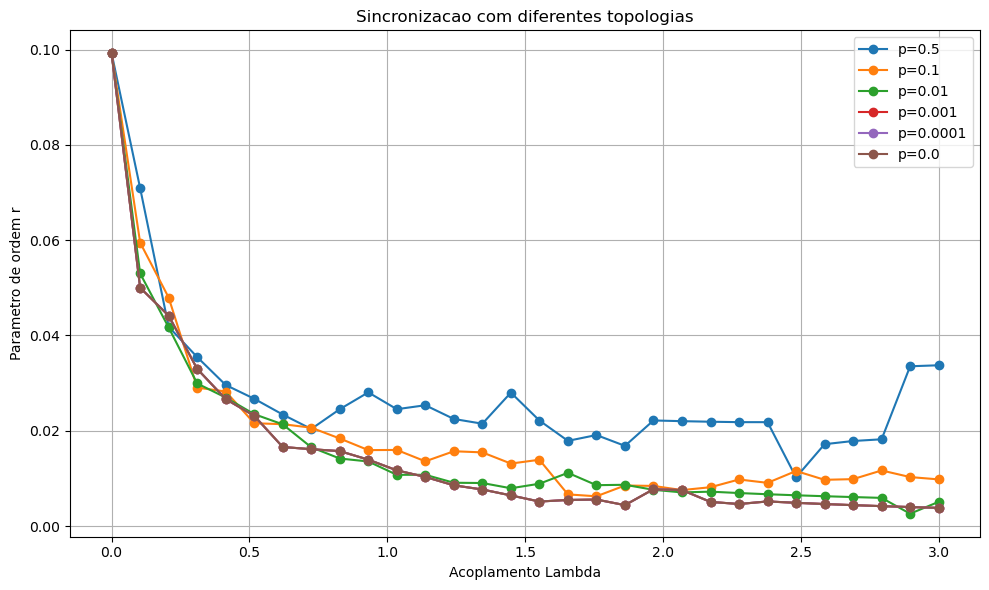

In [3]:
# Para valores distintos de p
p_list = [0.5, 0.1, 0.01, 0.001, 0.0001, 0.0]
results_ws_p = {}

# Adaptando para o modelo watts-strogatz
for p in p_list:
    G = nx.watts_strogatz_graph(N, k=10, p=p)
    r_vals = simulate_kuramoto(G, f"WS p={p}")
    results_ws_p[p] = r_vals

# Plotando para os p
plt.figure(figsize=(10, 6))
for p in p_list:
    plt.plot(K_values, results_ws_p[p], label=f'p={p}', marker='o')

plt.xlabel("Acoplamento Lambda")
plt.ylabel("Parametro de ordem r")
plt.title("Sincronizacao com diferentes topologias")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
